# Set Covering problem using Ant Colony algorithm

# هدف کلی
این کد با استفاده از الگوریتم Ant Colony مسئله پوشش مجموعه را حل می کند. مسئله پوشش مجموعه یک مسئله بهینه سازی کلاسیک است که شامل انتخاب حداقل تعداد مجموعه ها از مجموعه معینی از مجموعه ها است به طوری که اجتماع مجموعه های انتخاب شده همه عناصر یک مجموعه معین را پوشش می دهد و هزینه انتخاب مجموعه ها نیز کمینه می شود. الگوریتم کلونی مورچه ها یک الگوریتم بهینه سازی فراابتکاری است که از رفتار مورچه ها در یافتن کوتاه ترین مسیر از لانه تا منبع غذایی الهام گرفته شده است.
الگوریتم کلونی مورچه ها با شبیه سازی رفتار مورچه ها در یافتن کوتاه ترین مسیر بین لانه و منبع غذایی آنها کار می کند. این الگوریتم از یک دنباله فرمون برای هدایت مورچه ها در فضای جستجو استفاده می کند. دنباله فرمون نشان دهنده کیفیت راه حل یافت شده توسط مورچه های قبلی است. این الگوریتم همچنین از روش‌های اکتشافی برای کمک به مورچه‌ها برای تصمیم‌گیری بهتر هنگام انتخاب زیرمجموعه‌ها در راه‌حل استفاده می‌کند.

# الگوریتم کلی
۱- پارامترهای الگوریتم شامل اندازه جمعیت، اندازه مجموعه، تعداد زیر مجموعه ها، آرایه هزینه های زیر مجموعه ها، زیر مجموعه ها، پارامتر آلفا و بتا و نرخ تبخیر را مقدار دهی اولیه میکنیم.
۲- با انتخاب تصادفی زیرمجموعه های مجموعه داده شده، یک جمعیت اولیه از مورچه ها ایجاد میکنیم.
۳- فیتنس هر مورچه در جمعیت را با استفاده از تابع تناسب محاسبه میکنیم.
۴- دنباله فرمون را بر اساس فیتنس راه حل مورچه به روز میکنیم.
۵- آرایه فرمون را بر اساس نرخ تبخیر تبخیر میکنیم.
۶- مراحل 2-5 را تکرار میکنیم تا زمانی که یک معیار توقف (مثلاً حداکثر تعداد تکرار یا معیار همگرایی) برآورده شود.
۷- بهترین راه حل پیدا شده توسط مورچه ها را به عنوان راه حل نهایی انتخاب میکنیم.

# پیاده سازی
### ابتدا کتابخانه هایی که لازم داریم را ایمپورت میکنیم
به طور خلاصه، الگوریتم کلونی مورچه ها یک الگوریتم بهینه سازی فراابتکاری است که از رفتار مورچه ها در یافتن کوتاه ترین مسیر بین لانه و منابع غذایی آنها الهام گرفته شده است. این الگوریتم از یک دنباله فرمون برای هدایت مورچه ها در فضای جستجو و اکتشاف برای کمک به مورچه ها برای تصمیم گیری بهتر استفاده می کند. پیاده سازی ارائه شده در کلاس AntColony پیاده سازی الگوریتم حل مسئله Set Covering است. این کلاس چندین تابع دارد که برای مقداردهی اولیه الگوریتم، تولید جمعیت اولیه، محاسبه فیتنس هر مورچه و به روز رسانی لیست فرمون استفاده می شود. این تابع ها عبارتند از: Initial، fitness_function، evaporation_pheromone، evaporation_pheromone_array، calc_pheromone_array، check_feasible، select_next_subset، ant_tour و next_itation. با استفاده از الگوریتم Ant Colony، می‌توان راه‌حل‌های تقریباً بهینه را برای مسئله پوشش مجموعه‌ها به طور موثر پیدا کرد.

In [136]:
import random
import numpy as np
import time
from math import sqrt, ceil


### کلاس AntColony:

کلاس AntColony کلاس اصلی است که الگوریتم Ant Colony را پیاده سازی می کند. این کلاس چندین تایع دارد که برای مقداردهی اولیه الگوریتم، تولید جمعیت اولیه، محاسبه فیتنس هر مورچه و به روز رسانی دنباله فرمون استفاده می شود.

#### تابع init:

روش init ثابت ها و آرایه های مورد استفاده در الگوریتم را مقداردهی اولیه می کند. pop_size، set_size، subsets_size، subsets_costs_array، subsets، alpha، beta و evap_val ثابت های مورد استفاده در الگوریتم هستند. جمعیت، آرایه_فرومونی و fitness_arr آرایه هایی هستند که در روش algorithm.initial استفاده می شوند:

تابع initialنیز برای تولید جمعیت اولیه و محاسبه فیتنس مورچه های اولیه استفاده می شود. جمعیت با انتخاب تصادفی زیرمجموعه های مجموعه داده شده ایجاد می شود. تناسب اندام هر مورچه با استفاده از روش fitness_function محاسبه می شود.

#### تابع fitness_function:

تابع fitness_function فیتنس یک مورچه را با جمع کردن هزینه‌های زیر مجموعه‌های موجود در راه‌حل مورچه محاسبه می‌کند. سپس مقدار فیتنس معکوس می شود تا مسئله به یک مسئله حداکثر سازی تبدیل شود.

#### تابع های evaporation_pheromone و evaporation_pheromone_array:

روش تبخیر_فرومون برای تبخیر فرمون در زیر مجموعه بر اساس میزان تبخیر استفاده می شود. روش تبخیر_فرومون_آرایه برای تبخیر فرمون در تمامی زیر مجموعه ها بر اساس نرخ تبخیر استفاده می شود.

#### تابع calc_pheromone_array:
در این تابع فورومون های موجود بر روی هر زیرمجموعه، براساس تابعی از برازش راه حل ارائه شده شده توسط مورچه جایگذاری میشود. که این مقدار از فرمولی محاسبه میشود که بدین صورت است که فورمون قبلی و برازش راه حل ارائه شده. در واقع اگر راه حلی دارای هزینه کمتر باشد، برازش بیشتری دارد و درنتیجه فورمون  بیشتری دریافت میکند. همچنین تابع گفته شده را میتوان به عنوان پارامتر این تابع ورودی داد تا نحوه تاثیر برازش راه حل متفاوت شود. هر چه این تاثیر بیشتر شود، میزان انتفاع نیز بیشتر میشود.

#### تابع check_feasible:
روش check_feasible برای بررسی اینکه آیا راه حل مورچه یک راه حل امکان پذیر است یا خیر استفاده می شود. این تابع بررسی می‌کند که آیا اجتماع زیر مجموعه‌های موجود در راه‌حل، تمام عناصر مجموعه داده‌شده را پوشش می‌دهد یا خیر.

#### تابع select_next_subset:
تابع select_next_subset برای انتخاب زیرمجموعه بعدی برای اضافه کردن به راه حل مورچه استفاده می شود. این تابع از توزیع احتمال وزن دار برای انتخاب زیرمجموعه بعدی استفاده می کند. وزن هر زیر مجموعه بر اساس دنباله فرمون و اطلاعات اکتشافی محاسبه می شود. دنباله فرمون به توان آلفا و اطلاعات اکتشافی به توان بتا می‌رسد. اطلاعات اکتشافی به عنوان تعداد عناصر جدیدی که با اضافه کردن زیرمجموعه تقسیم بر هزینه زیرمجموعه پوشش داده می شود، محاسبه می شود.

#### تابع ant_tour:
روش ant_tour برای تولید یک راه حل برای مورچه استفاده می شود. این روش از روش select_next_subset برای انتخاب زیرمجموعه بعدی برای اضافه کردن به راه حل استفاده می کند تا زمانی که تمام عناصر مجموعه داده شده پوشش داده شوند.

#### تابع next_itation:
تابع next_iteration برای تولید یک جمعیت جدید با ایجاد یک راه حل برای هر مورچه در جمعیت فعلی استفاده می شود. فیتنس هر مورچه محاسبه می شود و دنباله فرمون به روز می شود. در نهایت، دنباله فرمون بر اساس نرخ تبخیر تبخیر می شود.



In [137]:
class AntColony:
    def __init__(self, pop_size: int, set_size: int, subsets_size: int, subsets_costs_array: list, subsets: list[list], alpha: float = 1, beta: float = 1, evap_val: float = 0.15):
        # First we set our constants:
        self.pop_size = pop_size            # Number of our ants
        self.set_size = set_size            # ex: n=5: U={0,1,2,3,4}
        self.subsets_size = subsets_size    # Number of subsets. ex: m=6 -> S = [ (0,1,2), (1,4), (3,4), (1,3,4), (2,3), (0,2) ]
        self.alpha = alpha
        self.beta = beta                    # Metahuristic parameters
        self.evap_val = evap_val            # Evaporation parameter
        # Then we set our constant Arrays:
        self.subsets = subsets              # ex: [ (0,1,2), (1,4), (3,4), (1,3,4), (2,3), (0,2) ]
        self.subsets_costs_array = subsets_costs_array      # ex: [    1   ,   3  ,   2  ,   1    ,   2  ,   1   ]  
        # Then we set our variable Arrays:
        self.population = None
        self.pheromone_array = [ 0.01 for idx in range(self.subsets_size)]
        self.fitness_arr     = [0 for i in range(self.pop_size)]

    def initial(self):
        # Set the inital population
        self.population = [list(random.sample(range(self.subsets_size), random.randint(1,self.subsets_size-1))) for i in range(self.pop_size)]
        # self.population = [self.ant_tour() for i in range(self.pop_size)]

        
        # Calculate first iteration fitnesses and pheromones
        for ant_idx in range(self.pop_size):
            curr_ant = self.population[ant_idx]
            self.fitness_arr[ant_idx] = self.fitness_function(curr_ant)
        # Set initial pheromones based on fitnesses
        # init_pheromone = (sum(self.fitness_arr)/self.pop_size)
        # for i in range(self.pop_size):
        #     self.pheromone_array[i] = init_pheromone
        # self.calc_pheromone_array(self.population[ant_idx])  # Can be comment

    def fitness_function(self, ant:list[int]):
        fitness_value = 0
        for idx_of_subset in ant:
            fitness_value += self.subsets_costs_array[idx_of_subset]
        return 1/fitness_value
    
    def evaporation_pheromone(self, pheromone, p):  # p should be less than 1
        return (1-p)*pheromone

    def evaporation_pheromone_array(self):
        for i in range(self.subsets_size - 1):
            random_p = self.evap_val
            curr_pheromone = self.evaporation_pheromone(self.pheromone_array[i], random_p)
            self.pheromone_array[i] = curr_pheromone

    def calc_pheromone_array(self, ant, func=lambda a: a):
        delta_fitness = func(self.fitness_function(ant))
        for idx_of_subset in ant:
            self.pheromone_array[idx_of_subset] += delta_fitness


    def check_feasible(self,ant:list[set]):
        res = set()
        for subset_idx in ant:
            res = res.union(self.subsets[subset_idx])
        return True if len(res) == self.set_size else False
    
    def select_next_subset(self,  neighbors, numbers:set):
        indexes = []
        weights = []
        for subset_idx in range(self.subsets_size):
            if neighbors[subset_idx] == False :
                # difference = set.symmetric_difference( numbers, self.subsets[subset_idx])
                # number_of_nums_will_add = len( difference)
                # if number_of_nums_will_add >0:
                indexes.append(subset_idx)
                weights.append((self.pheromone_array[subset_idx] ** self.alpha)*( (1 / self.subsets_costs_array[subset_idx]) ** self.beta) )
        next_subset = random.choices(indexes, weights=weights)[0]
        return next_subset

    def ant_tour(self):
        visited_numbers = set()
        visited_subsets = [ False for i in range(self.subsets_size)]
        tour = []
        while len(visited_numbers)<self.set_size:
            next_subset_idx = self.select_next_subset(visited_subsets,visited_numbers)
            tour.append(next_subset_idx)
            visited_numbers=visited_numbers.union(self.subsets[next_subset_idx])
            visited_subsets[next_subset_idx] = True
        return tour

    def next_iteration(self):
        for ant_idx in range(self.pop_size):
            curr_ant = self.ant_tour()
            self.population[ant_idx] = curr_ant
            self.fitness_arr[ant_idx] = self.fitness_function(curr_ant)
            self.calc_pheromone_array(curr_ant)
        self.evaporation_pheromone_array()


In [138]:
def read_file(filename):
    file = open(filename).read().replace('\n', '')
    numbers = list(map(int, file.split()))
    n, m = numbers[:2]
    subsets = [set( ) for _ in range(m)]
    costs = numbers[2:m+2]
    index = m+2
    counter = 0
    while (counter < n):
        size = numbers[index]
        index += 1
        ls = numbers[index:index+size]
        index += size

        for element in ls:
            subsets[element-1].add(counter)
        counter += 1
    return n,m,subsets,costs


In [146]:
def min_set_coveringing(ant_colony: AntColony, stop_point, stop_gen=500):
    MAX_INT = 2*10**8

    set_covering = ant_colony
    set_covering.initial()
    set_covering.next_iteration()
    ith_gen_arr = [1]
    min_cost_iteration = [1/max(set_covering.fitness_arr)]
    best_ans = MAX_INT
    best_ans_array = 0
    ith_gen = 1
    while (1/max(set_covering.fitness_arr) > stop_point) and ith_gen < stop_gen:
        set_covering.next_iteration()
        ith_gen_arr.append(ith_gen)
        min_cost_iteration.append(1/max(set_covering.fitness_arr)  )
        if best_ans > min(min_cost_iteration):
            best_ans = min(min_cost_iteration)
            # print(set_covering.fitness_arr)
            best_ans_array = set_covering.population[set_covering.fitness_arr.index(1/(best_ans ))]
        print(
            f"The minimum distance in {ith_gen}th gen is: {1/max(set_covering.fitness_arr) } and or best minimum distance is: {best_ans} till now")
        ith_gen += 1

    print('----------------------------------------')
    print(
        f"\n{set_covering.set_size}-n set_covering problem solved in generation {ith_gen_arr[-1]}th with population of{set_covering.pop_size}. And best fitness(minimum distance) is: { best_ans} which is:{best_ans_array}")
    print('----------------------------------------')
    return (ith_gen_arr, min_cost_iteration)


# تست کیس اول

In [140]:
n,m,subsets,costs = read_file('scp41.txt')
print(n)
print(m)
print(subsets)
print(costs)


200
1000
[{195, 198, 74, 75, 106, 17, 189, 31}, {2, 3, 137, 107, 109, 180, 159}, {97, 9, 11, 109, 153, 127}, {117, 75, 101, 174}, {105, 179, 85, 159}, {16, 9, 94, 95}, {163, 91, 77}, {64, 187, 38}, {81, 108, 141}, {185, 132, 93}, {32, 128, 30}, {27}, {96, 165, 71, 78, 48, 83, 60}, {64, 163, 5, 12, 46, 60}, {145, 18, 196, 198}, {120, 35, 166, 22}, {16, 65, 121, 31}, {75, 4, 44, 76}, {99, 60, 45, 22}, {88, 52, 119, 31}, {72, 50, 60}, {1, 169, 182}, {168, 190, 166}, {80, 81, 11}, {80, 174, 191}, {144, 59, 184}, {152, 132}, {66, 67, 150, 25, 91, 126}, {103, 75, 11, 46, 117}, {74, 52, 88, 63, 127}, {184, 139, 196, 85}, {116, 28, 77, 135}, {16, 140, 120, 158}, {124, 169, 28, 127}, {43, 26, 35, 121}, {65, 19, 199}, {2, 31}, {40, 127}, {34, 151}, {198, 78}, {94}, {87}, {34, 194, 70, 135, 188, 93}, {39, 43, 175, 176, 20, 95}, {191, 11, 77, 179, 89, 159}, {40, 49, 147, 180, 156}, {1, 131, 166, 83, 62}, {142, 181, 30, 111}, {142, 139, 165, 14}, {148, 75, 100}, {75, 5, 111}, {73, 25, 120}, {8, 64}


## تحلیل
به طور کلی در حل مسئله set covering با استفاده از الگوریتم کلونی مورچگان، رسیدن به جواب مسئله میتواند به مقدار دهی اولیه، و همچنین مقدار دهی پارامتر ها بسیار وابسته باشد. 
من به شخصه پس از بالا و پایین کردن بسیار پارامتر های الفا و بتا و همچنین ضریب تبخیر توانستم به جواب برسم. به طور که با الفای ۲۰ و ۱۰ جواب مشابه دریافت میکردم که خوب نبود، ولی با الفای ۱۵ انتفاع مسئله به طور مناسبی انتخاب می شد.
همچنین پارامتر بتا بسیار تاثیر گذار در پویش مسئله تاثیر گذار بود به طوری که کمی بالا و پایین شدن آن پویش مسئله را زیاد میکرد.

The minimum distance in 1th gen is: 6264.0 and or best minimum distance is: 6264.0 till now
The minimum distance in 2th gen is: 3094.0 and or best minimum distance is: 3094.0 till now
The minimum distance in 3th gen is: 1865.0 and or best minimum distance is: 1865.0 till now
The minimum distance in 4th gen is: 1418.0 and or best minimum distance is: 1418.0 till now
The minimum distance in 5th gen is: 1226.0 and or best minimum distance is: 1226.0 till now
The minimum distance in 6th gen is: 1100.0 and or best minimum distance is: 1100.0 till now
The minimum distance in 7th gen is: 1066.0 and or best minimum distance is: 1066.0 till now
The minimum distance in 8th gen is: 1010.0 and or best minimum distance is: 1010.0 till now
The minimum distance in 9th gen is: 939.0 and or best minimum distance is: 939.0 till now
The minimum distance in 10th gen is: 881.0 and or best minimum distance is: 881.0 till now
The minimum distance in 11th gen is: 838.0000000000001 and or best minimum distance

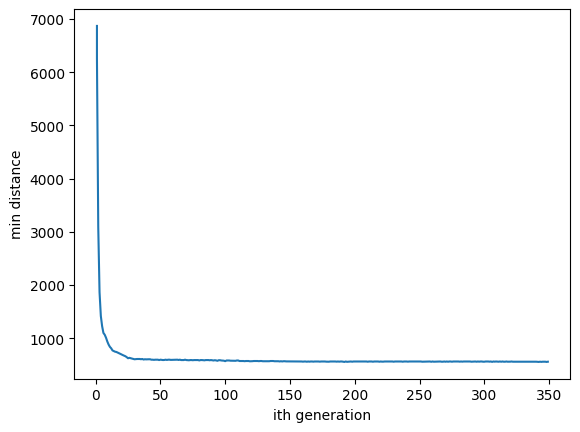

In [141]:
import matplotlib.pyplot as plt
test = AntColony(pop_size=10, set_size=n, subsets_size=m, subsets=subsets, subsets_costs_array=costs,alpha=15,beta=1/2,evap_val=0.2)
x, y = min_set_coveringing(test, stop_point=500, stop_gen=350)
plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")

plt.show()


# تست کیس دوم

### تحلیل
در تست کیس دوم نیز مانند تست کیس اول، مقادر الفا و بتا با همان آلفای ۱۵ و بتای ۰.۵ جواب مسئله به دست می آید. احتمالا بدلیل زیاد بودن تعداد زیر مجموعه ها، در این تست کیس، شانس اتخاب یک مجموعه خوب از زیرمحموعه ها بیشتر باشد.

The minimum distance in 1th gen is: 6020.0 and or best minimum distance is: 6020.0 till now
The minimum distance in 2th gen is: 6411.0 and or best minimum distance is: 6020.0 till now
The minimum distance in 3th gen is: 3304.0 and or best minimum distance is: 3304.0 till now
The minimum distance in 4th gen is: 1707.0 and or best minimum distance is: 1707.0 till now
The minimum distance in 5th gen is: 1954.0 and or best minimum distance is: 1707.0 till now
The minimum distance in 6th gen is: 1619.0000000000002 and or best minimum distance is: 1619.0000000000002 till now
The minimum distance in 7th gen is: 1526.0 and or best minimum distance is: 1526.0 till now
The minimum distance in 8th gen is: 1408.0 and or best minimum distance is: 1408.0 till now
The minimum distance in 9th gen is: 1376.0 and or best minimum distance is: 1376.0 till now
The minimum distance in 10th gen is: 1208.0 and or best minimum distance is: 1208.0 till now
The minimum distance in 11th gen is: 1244.0 and or best

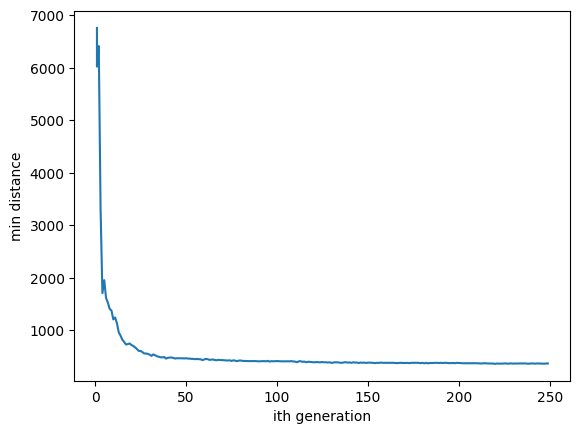

In [145]:
n,m,subsets,costs = read_file('scp52.txt')
test = AntColony(pop_size=10, set_size=n, subsets_size=m, subsets=subsets, subsets_costs_array=costs,alpha=15,beta=1/2,evap_val=0.15)
x, y =min_set_coveringing(test,stop_point=370,stop_gen=250)
plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")

plt.show()


# تست کیس سوم
### تحلیل
  در تست کیس سوم برخلاف تست کیس اول و دوم که مسئله به نظر خارپشتی یا به عبارتی دیگر دارای چندین جواب بهینه بودند، اینجا اینگونه نبوده و با پویش بیشتر به جواب بهتری می توان رسید همچنین مشاهده میکنیم که در ایتریشن های اولیه ( مثلا ایتریشن ۲۰ ) توانستیم به جواب ۲۳۰ برسیم که بسیار سریع و خوب است!

The minimum distance in 1th gen is: 895.0000000000001 and or best minimum distance is: 895.0000000000001 till now
The minimum distance in 2th gen is: 670.0 and or best minimum distance is: 670.0 till now
The minimum distance in 3th gen is: 358.0 and or best minimum distance is: 358.0 till now
The minimum distance in 4th gen is: 329.0 and or best minimum distance is: 329.0 till now
The minimum distance in 5th gen is: 307.0 and or best minimum distance is: 307.0 till now
The minimum distance in 6th gen is: 319.0 and or best minimum distance is: 307.0 till now
The minimum distance in 7th gen is: 300.0 and or best minimum distance is: 300.0 till now
The minimum distance in 8th gen is: 264.0 and or best minimum distance is: 264.0 till now
The minimum distance in 9th gen is: 289.0 and or best minimum distance is: 264.0 till now
The minimum distance in 10th gen is: 275.0 and or best minimum distance is: 264.0 till now
The minimum distance in 11th gen is: 241.0 and or best minimum distance is:

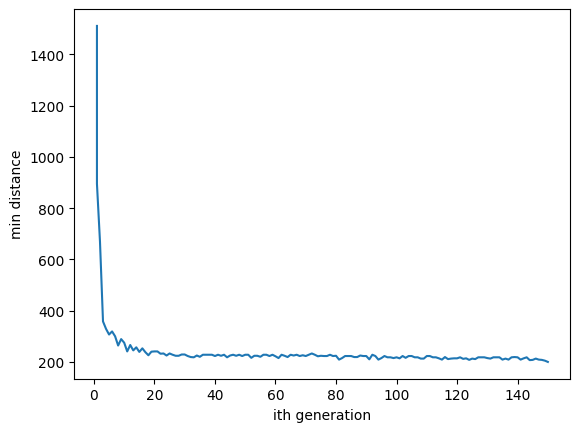

In [147]:
import matplotlib.pyplot as plt
n,m,subsets,costs = read_file('scp62.txt')
test = AntColony(pop_size=10, set_size=n, subsets_size=m, subsets=subsets, subsets_costs_array=costs,alpha=5,beta=1,evap_val=0.15)
x, y = min_set_coveringing(test, stop_point=200, stop_gen=250)
plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")

plt.show()
